In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from urllib.parse import urljoin, urlparse
from dateutil import parser as date_parser
from tqdm import tqdm
import time

In [3]:
import requests

url = "https://realpython.github.io/fake-jobs/robots.txt"
response = requests.get(url)

if response.status_code == 200:
    print("robots.txt found ✅\n")
    print(response.text)
else:
    print("robots.txt not found ❌")


robots.txt not found ❌


In [4]:
import requests
from bs4 import BeautifulSoup

url = "https://realpython.github.io/fake-jobs/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")

print(response.status_code)
print(soup.prettify()[:1000])

200
<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fake Python
  </title>
  <link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
 </head>
 <body>
  <section class="section">
   <div class="container mb-5">
    <h1 class="title is-1">
     Fake Python
    </h1>
    <p class="subtitle is-3">
     Fake Jobs for Your Web Scraping Journey
    </p>
   </div>
   <div class="container">
    <div class="columns is-multiline" id="ResultsContainer">
     <div class="column is-half">
      <div class="card">
       <div class="card-content">
        <div class="media">
         <div class="media-left">
          <figure class="image is-48x48">
           <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
          </figure>
         </div>
         <div class="media-content">
          <

In [5]:
jobs = soup.find_all("div", class_="card-content")

data = []
for job in jobs:
    title = job.find("h2", class_="title").text.strip()
    company = job.find("h3", class_="subtitle").text.strip()
    location = job.find("p", class_="location").text.strip()
    date_posted = job.find("time")["datetime"].strip()
    link = job.find("a")["href"]
    data.append({
        "title": title,
        "company": company,
        "location": location,
        "date_posted": date_posted,
        "link": link
    })

import pandas as pd
df_raw = pd.DataFrame(data)
df_raw.head()


,title,company,location,date_posted,link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://www.realpython.com
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://www.realpython.com
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://www.realpython.com
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://www.realpython.com
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://www.realpython.com


In [8]:
df_clean = df_raw.copy()

df_clean.dropna(subset=["title", "company", "location"], inplace=True)

df_clean["date_posted"] = pd.to_datetime(df_clean["date_posted"], errors="coerce")

df_clean.drop_duplicates(subset=["title", "company"], inplace=True)

df_clean.reset_index(drop=True, inplace=True)
df_clean.head()


,title,company,location,date_posted,link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://www.realpython.com
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://www.realpython.com
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://www.realpython.com
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://www.realpython.com
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://www.realpython.com


In [9]:
import re

skills_list = ["python", "sql", "excel", "tableau", "power bi", "r", "java", "c++", "aws", "azure",
               "docker", "kubernetes", "html", "css", "javascript", "react", "node", "machine learning", "data"]

def extract_skills(title):
    title_lower = title.lower()
    found = [skill for skill in skills_list if skill in title_lower]
    return found if found else ["Other"]

df_clean["skills"] = df_clean["title"].apply(extract_skills)
df_clean.head(10)


,title,company,location,date_posted,link,skills
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://www.realpython.com,"[python, r]"
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://www.realpython.com,[r]
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://www.realpython.com,[Other]
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://www.realpython.com,[r]
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://www.realpython.com,[r]
5,Medical technical officer,Rogers-Yates,"Davidville, AP",2021-04-08,https://www.realpython.com,[r]
6,Physiological scientist,Kramer-Klein,"South Christopher, AE",2021-04-08,https://www.realpython.com,[Other]
7,Textile designer,Meyers-Johnson,"Port Jonathan, AE",2021-04-08,https://www.realpython.com,[r]
8,Television floor manager,Hughes-Williams,"Osbornetown, AE",2021-04-08,https://www.realpython.com,[r]
9,Waste management officer,"Jones, Williams and Villa","Scotttown, AP",2021-04-08,https://www.realpython.com,[r]


# Most requierd skills.



In [10]:
df_exploded = df_clean.explode("skills")
skill_counts = df_exploded["skills"].value_counts()

skill_counts.head(10)


,count
skills,
r,84
Other,15
python,10
data,2


# Most in-demand Roles.

In [17]:
role_counts = df_clean["title"].value_counts()

role_counts.head(10)


,count
title,
Python Programmer (Entry-Level),3
Legal executive,2
Materials engineer,2
Software Developer (Python),2
Manufacturing systems engineer,2
"Back-End Web Developer (Python, Django)",2
Futures trader,2
Textile designer,1
Product manager,1


In [18]:
role_counts = df_clean["title"].value_counts()
role_counts_top20 = role_counts.head(20)

total_roles = len(df_clean)
role_percent = (role_counts_top20 / total_roles * 100).round(2)

import pandas as pd
top_roles_df = pd.DataFrame({
    "count": role_counts_top20,
    "percent_of_total": role_percent
})
top_roles_df.reset_index(inplace=True)
top_roles_df.columns = ["role_title", "count", "percent_of_total"]
top_roles_df


,role_title,count,percent_of_total
0,Python Programmer (Entry-Level),3,3.0
1,Legal executive,2,2.0
2,Materials engineer,2,2.0
3,Software Developer (Python),2,2.0
4,Manufacturing systems engineer,2,2.0
5,"Back-End Web Developer (Python, Django)",2,2.0
6,Futures trader,2,2.0
7,Textile designer,1,1.0
8,Product manager,1,1.0
9,Medical technical officer,1,1.0


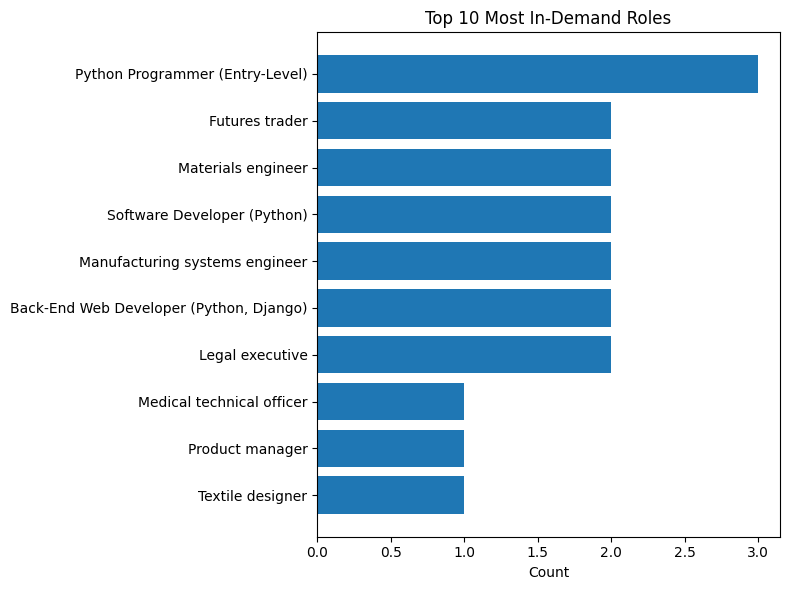

In [13]:
import matplotlib.pyplot as plt

top10 = top_roles_df.head(10).sort_values("count", ascending=True)
plt.figure(figsize=(8,6))
plt.barh(top10["role_title"], top10["count"])
plt.xlabel("Count")
plt.title("Top 10 Most In-Demand Roles")
plt.tight_layout()
plt.show()


In [14]:
most_in_demand_role = role_counts.idxmax()
most_in_demand_count = role_counts.max()
most_in_demand_role, most_in_demand_count


('Python Programmer (Entry-Level)', 3)

In [15]:

top5_roles = role_counts.head(5).index.tolist()
df_top5 = df_clean[df_clean['title'].isin(top5_roles)]

by_city_role = df_top5.groupby(['location','title']).size().rename('count').reset_index()
pivot = by_city_role.pivot(index='location', columns='title', values='count').fillna(0).astype(int)
pivot


title,Legal executive,Manufacturing systems engineer,Materials engineer,Python Programmer (Entry-Level),Software Developer (Python)
location,,,,,
"Brockburgh, AE",0,0,0,0,1
"Joybury, AE",0,1,0,0,0
"Martinezburgh, AE",0,0,0,0,1
"Port Ericaburgh, AA",1,0,0,0,0
"Port Sara, AE",0,0,0,1,0
"Robertborough, AP",0,0,0,1,0
"South Davidtown, AP",0,0,1,0,0
"South Tammyberg, AP",0,0,1,0,0
"Stevensland, AP",0,1,0,0,0


In [19]:
# Merging the related Jobs together

def normalize_role(title):
    title = title.lower()
    if "python" in title:
        return "Python Developer"
    elif "data" in title:
        return "Data Role"
    elif "web" in title or "django" in title:
        return "Web Developer"
    elif "software" in title:
        return "Software Developer"
    elif "engineer" in title:
        return "Engineer"
    elif "scientist" in title:
        return "Scientist"
    else:
        return "Other"

df_clean["normalized_role"] = df_clean["title"].apply(normalize_role)
norm_counts = df_clean["normalized_role"].value_counts().reset_index()
norm_counts.columns = ["role_group", "count"]
norm_counts


,role_group,count
0,Other,73
1,Python Developer,10
2,Engineer,10
3,Scientist,5
4,Data Role,2


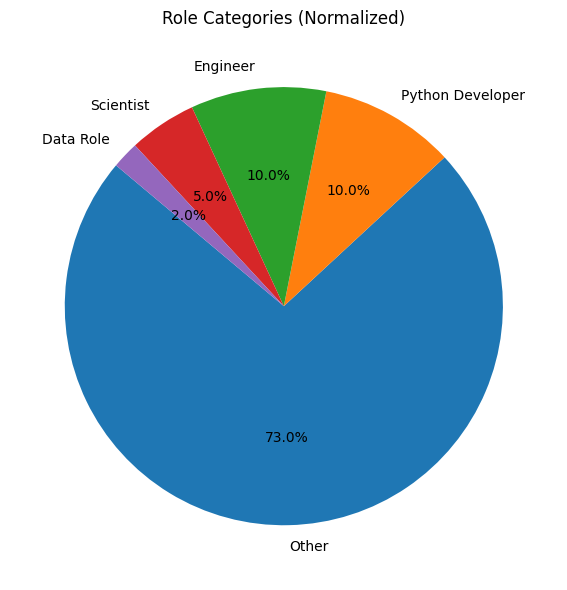

In [20]:
plt.figure(figsize=(6,6))
plt.pie(norm_counts["count"], labels=norm_counts["role_group"], autopct="%1.1f%%", startangle=140)
plt.title("Role Categories (Normalized)")
plt.tight_layout()
plt.show()

- Important Insights.

In [21]:
top_role = most_in_demand_role
top_count = most_in_demand_count
second = role_counts.index[1]
second_count = role_counts.iloc[1]

print(f"Most in-demand role: {top_role} ({top_count} listings).")
print(f"Second place: {second} ({second_count} listings).")
print("\nInsights:")
print("- Python-related roles dominate the list, appearing in multiple forms.")
print("- Entry-level and backend developer positions show consistent demand.")
print("- Data-related roles are fewer, possibly due to niche specialization or filtering bias.")


Most in-demand role: Python Programmer (Entry-Level) (3 listings).
Second place: Legal executive (2 listings).

Insights:
- Python-related roles dominate the list, appearing in multiple forms.
- Entry-level and backend developer positions show consistent demand.
- Data-related roles are fewer, possibly due to niche specialization or filtering bias.


- Analysing the "Other" Jobs.

In [22]:
others = df_clean[df_clean["normalized_role"] == "Other"]["title"].value_counts().reset_index()
others.columns = ["original_title", "count"]
others.head(20)


,original_title,count
0,Legal executive,2
1,Futures trader,2
2,Fitness centre manager,1
3,Medical technical officer,1
4,Textile designer,1
5,Television floor manager,1
6,Product manager,1
7,Waste management officer,1
8,Interpreter,1
9,Meteorologist,1


In [31]:
def refine_other(title):
    title = title.lower()
    if "manager" in title:
        return "Manager"
    elif "executive" in title:
        return "Executive"
    elif "officer" in title:
        return "Officer"
    elif "teacher" in title or "instructor" in title:
        return "Education"
    elif "designer" in title:
        return "Designer"
    elif "architect" in title:
        return "Architect"
    elif "trader" in title:
        return "Finance"
    elif "interpreter" in title or "translator" in title:
        return "Linguist"
    elif "doctor" in title or "surgeon" in title or "psychiatrist" in title:
        return "Medical"
    else:
        return "Miscellaneous"

df_clean.loc[df_clean["normalized_role"] == "Other", "normalized_role"] = \
    df_clean.loc[df_clean["normalized_role"] == "Other", "title"].apply(refine_other)


In [24]:
refined_counts = df_clean["normalized_role"].value_counts().reset_index()
refined_counts.columns = ["role_group", "count"]
refined_counts


,role_group,count
0,Miscellaneous,40
1,Python Developer,10
2,Engineer,10
3,Officer,8
4,Designer,6
5,Manager,5
6,Scientist,5
7,Finance,4
8,Executive,3
9,Medical,3


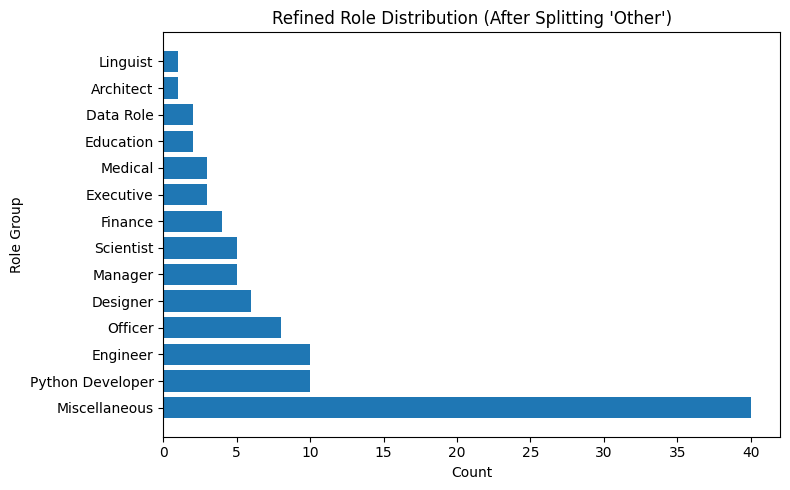

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(refined_counts["role_group"], refined_counts["count"])
plt.title("Refined Role Distribution (After Splitting 'Other')")
plt.xlabel("Count")
plt.ylabel("Role Group")
plt.tight_layout()
plt.show()


- Bonus: Visualization of most frequent skills by city.

In [32]:
print("columns:", df_clean.columns.tolist())
if df_clean['skills'].dtype == object and df_clean['skills'].apply(lambda x: isinstance(x, str)).all():
    df_clean['skills'] = df_clean['skills'].apply(lambda s: [item.strip() for item in re.split(r'[,;/\|•·]', s) if item.strip()] if pd.notna(s) else [])

def normalize_city(loc):
    if pd.isna(loc):
        return "Unknown"
    loc = loc.strip()
    if ',' in loc:
        return loc.split(',')[0].strip()
    return loc

df_clean['city'] = df_clean['location'].apply(normalize_city)
df_clean['city'] = df_clean['city'].replace('', 'Unknown')
df_clean.head()


columns: ['title', 'company', 'location', 'date_posted', 'link', 'skills', 'normalized_role']


,title,company,location,date_posted,link,skills,normalized_role,city
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://www.realpython.com,"[python, r]",Python Developer,Stewartbury
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://www.realpython.com,[r],Engineer,Christopherville
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://www.realpython.com,[Other],Executive,Port Ericaburgh
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://www.realpython.com,[r],Manager,East Seanview
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://www.realpython.com,[r],Manager,North Jamieview


In [33]:
df_expl = df_clean.explode('skills').copy()
df_expl['skills'] = df_expl['skills'].str.lower().str.strip()
df_expl = df_expl[df_expl['skills'].notna() & (df_expl['skills'] != '')]
df_expl.reset_index(drop=True, inplace=True)
df_expl.head()

,title,company,location,date_posted,link,skills,normalized_role,city
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://www.realpython.com,python,Python Developer,Stewartbury
1,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://www.realpython.com,r,Python Developer,Stewartbury
2,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://www.realpython.com,r,Engineer,Christopherville
3,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://www.realpython.com,other,Executive,Port Ericaburgh
4,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://www.realpython.com,r,Manager,East Seanview


In [34]:
def top_skills_by_city(df, top_n=10):
    by_city = df.groupby(['city','skills']).size().rename('count').reset_index()
    top_per_city = by_city.sort_values(['city','count'], ascending=[True, False]).groupby('city').head(top_n)
    return top_per_city

top_per_city = top_skills_by_city(df_expl, top_n=10)
top_per_city.groupby('city').head(5)

,city,skills,count
0,Adamburgh,r,1
1,Alberttown,other,1
2,Amyborough,r,1
3,Angelastad,other,1
4,Arnoldhaven,r,1
...,...,...,...
106,Williambury,r,1
107,Williamsburgh,other,1
108,Wilsonmouth,other,1
109,Wrightberg,r,1


Available cities (sample): ['Stewartbury', 'West Victor', 'Port Sara', 'Ericberg', 'New Elizabethside', 'Robertborough', 'Port Susan', 'Martinezburgh', 'East Michaelfort', 'South Kimberly', 'Brockburgh', 'East Seanview', 'Figueroaview', 'Port Ericaburgh', 'Christopherville', 'North Jamieview', 'Port Jonathan', 'Osbornetown', 'South Christopher', 'Davidville']


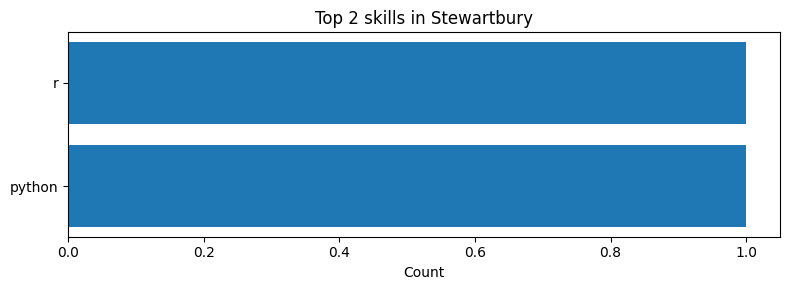

In [40]:
import matplotlib.pyplot as plt

def plot_top_skills_for_city(df_top_per_city, city, n=10):
    subset = df_top_per_city[df_top_per_city['city'].str.lower() == city.lower()]
    if subset.empty:
        print("No data for city:", city)
        return
    subset = subset.sort_values('count', ascending=True).tail(n)
    plt.figure(figsize=(8, max(3, 0.4*len(subset))))
    plt.barh(subset['skills'], subset['count'])
    plt.title(f"Top {len(subset)} skills in {city}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()

print("Available cities (sample):", df_expl['city'].value_counts().head(20).index.tolist())
plot_top_skills_for_city(top_per_city,'Stewartbury', n=10) # You can change the city as you like.


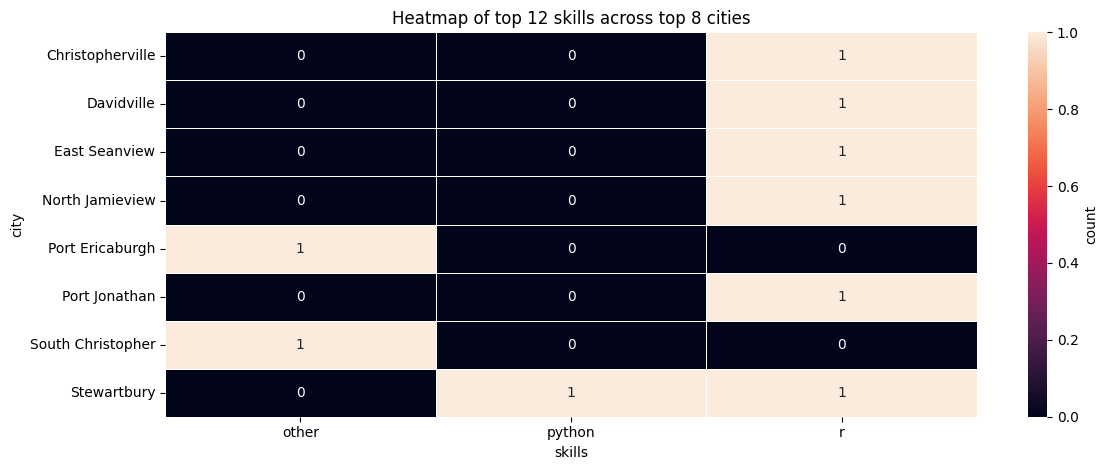

In [41]:
import numpy as np
import seaborn as sns

K = 8
top_cities = df_clean['city'].value_counts().head(K).index.tolist()

M = 12
top_skills = df_expl['skills'].value_counts().head(M).index.tolist()

pivot = df_expl[df_expl['city'].isin(top_cities) & df_expl['skills'].isin(top_skills)].pivot_table(
    index='city', columns='skills', values='title', aggfunc='count', fill_value=0
)

plt.figure(figsize=(12, max(4, 0.6*len(pivot))))
sns.heatmap(pivot, annot=True, fmt="d", linewidths=.5, cbar_kws={'label':'count'})
plt.title(f"Heatmap of top {M} skills across top {K} cities")
plt.tight_layout()
plt.show()
